# Machine Learning- Homework 3
# Name: Lizabeth Singh

In [2]:
import requests
import pprint as pp
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage 
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram

#Here I am importing packages that will be essential in my analysis

In [3]:
redwine=pd.read_csv('/Users/liz/Desktop/MACHINE LEARNING/winequality-red (1).csv')
redwine

#Here I am calling the desired data from the Path on my computer 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
r= pd.DataFrame(scale(redwine),index=redwine.index,columns=redwine.columns)
r

#Here I am scaling my data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


# 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [5]:
within_cluster_variance = []

for k in range (2,20):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(r)
    within_cluster_variance.append(kmeans.inertia_)
    
#Here I am using K mean cluster analysis 
#What this does it highlights the initial cluster centers for k-mean clusters in an efficient way to speed up covergence

Text(0.5, 1.0, 'Elbow Curve for Clustering Analysis')

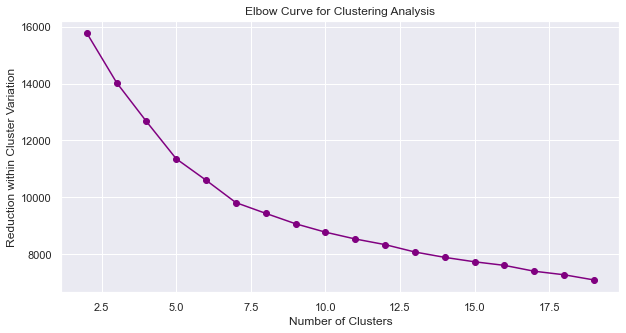

In [6]:
fig = plt.figure(figsize=(10,5), linewidth=2)
plt.plot(range(2,20),within_cluster_variance,marker='o',color='purple')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Reduction within Cluster Variation')
plt.title('Elbow Curve for Clustering Analysis')

#Here I am making a line graph for K-clusters
#We can see that there is a downward slope... therefore I will use 6 for K

In [7]:
np.random.seed(4)
km6 = KMeans(n_clusters=6,n_init=20)
km6.fit(r)

#Here I am setting a random seed in this case it is 4

KMeans(n_clusters=6, n_init=20)

In [8]:
pd.Series(km6.labels_).value_counts()

#Here I am using value counts that returns objects within this data that have unique values 

1    528
5    347
0    342
2    320
3     34
4     28
dtype: int64

In [9]:
km6.cluster_centers_

#Here I am using clustering centers to get an array that defines the location of the cluster centers 

array([[-5.93277398e-02,  6.37117172e-02,  8.29766631e-02,
        -1.88187614e-02, -3.02994317e-02,  9.46458474e-01,
         1.21200318e+00,  2.71509158e-01, -1.29599069e-01,
        -1.97347051e-01, -6.04447149e-01, -4.72722124e-01],
       [-4.87772518e-01,  6.91757832e-01, -8.18739567e-01,
        -2.13971161e-01, -6.92893056e-02, -4.33319441e-01,
        -4.18295753e-01, -8.41563415e-02,  4.28420577e-01,
        -4.18261767e-01, -4.16183473e-01, -4.61733117e-01],
       [-6.20284483e-01, -4.62325700e-01, -1.32423135e-01,
        -2.28291732e-01, -3.87700653e-01,  1.35235358e-01,
        -2.37921048e-01, -1.16287876e+00,  5.44740799e-01,
         1.97553103e-01,  1.23834975e+00,  8.45674735e-01],
       [-8.56332101e-02, -3.46521643e-02,  4.14855742e-01,
         4.96176756e+00,  2.96387895e-01,  1.75019116e+00,
         1.69583213e+00,  1.22500051e+00, -3.25459600e-01,
        -2.37893278e-02, -3.63912996e-01, -2.27611435e-02],
       [ 9.54162998e-02,  2.19980305e-03,  1.1815526

In [10]:
km6.labels_

#Here I am using k labels, this assigns each instance to one of the five clusters and gets a label for each index

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [11]:
km6.inertia_

#Here I am using inertia for k mean clustering in order to measure how well a dataset was clustered by the K-Means 

10567.49713354833

In [12]:
r['cluster']=km6.labels_
display(r.groupby('cluster').mean())

#Here I am bringing everything together and putting it into a dataframe by cluster

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.059328,0.063712,0.082977,-0.018819,-0.030299,0.946458,1.212003,0.271509,-0.129599,-0.197347,-0.604447,-0.472722
1,-0.487773,0.691758,-0.818740,-0.213971,-0.069289,-0.433319,-0.418296,-0.084156,0.428421,-0.418262,-0.416183,-0.461733
2,-0.620284,-0.462326,-0.132423,-0.228292,-0.387701,0.135235,-0.237921,-1.162879,0.544741,0.197553,1.238350,0.845675
3,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
4,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
5,1.373386,-0.685812,1.150154,0.099949,-0.002995,-0.565682,-0.545988,0.798293,-0.854560,0.355479,0.192851,0.418721


In [13]:
r['cluster']=km6.labels_
r.groupby('cluster').mean().sort_values('quality',ascending=False)

#Here I am essentially doing the same thing but by quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
2,-0.620284,-0.462326,-0.132423,-0.228292,-0.387701,0.135235,-0.237921,-1.162879,0.544741,0.197553,1.238350,0.845675
5,1.373386,-0.685812,1.150154,0.099949,-0.002995,-0.565682,-0.545988,0.798293,-0.854560,0.355479,0.192851,0.418721
3,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
4,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
1,-0.487773,0.691758,-0.818740,-0.213971,-0.069289,-0.433319,-0.418296,-0.084156,0.428421,-0.418262,-0.416183,-0.461733
0,-0.059328,0.063712,0.082977,-0.018819,-0.030299,0.946458,1.212003,0.271509,-0.129599,-0.197347,-0.604447,-0.472722


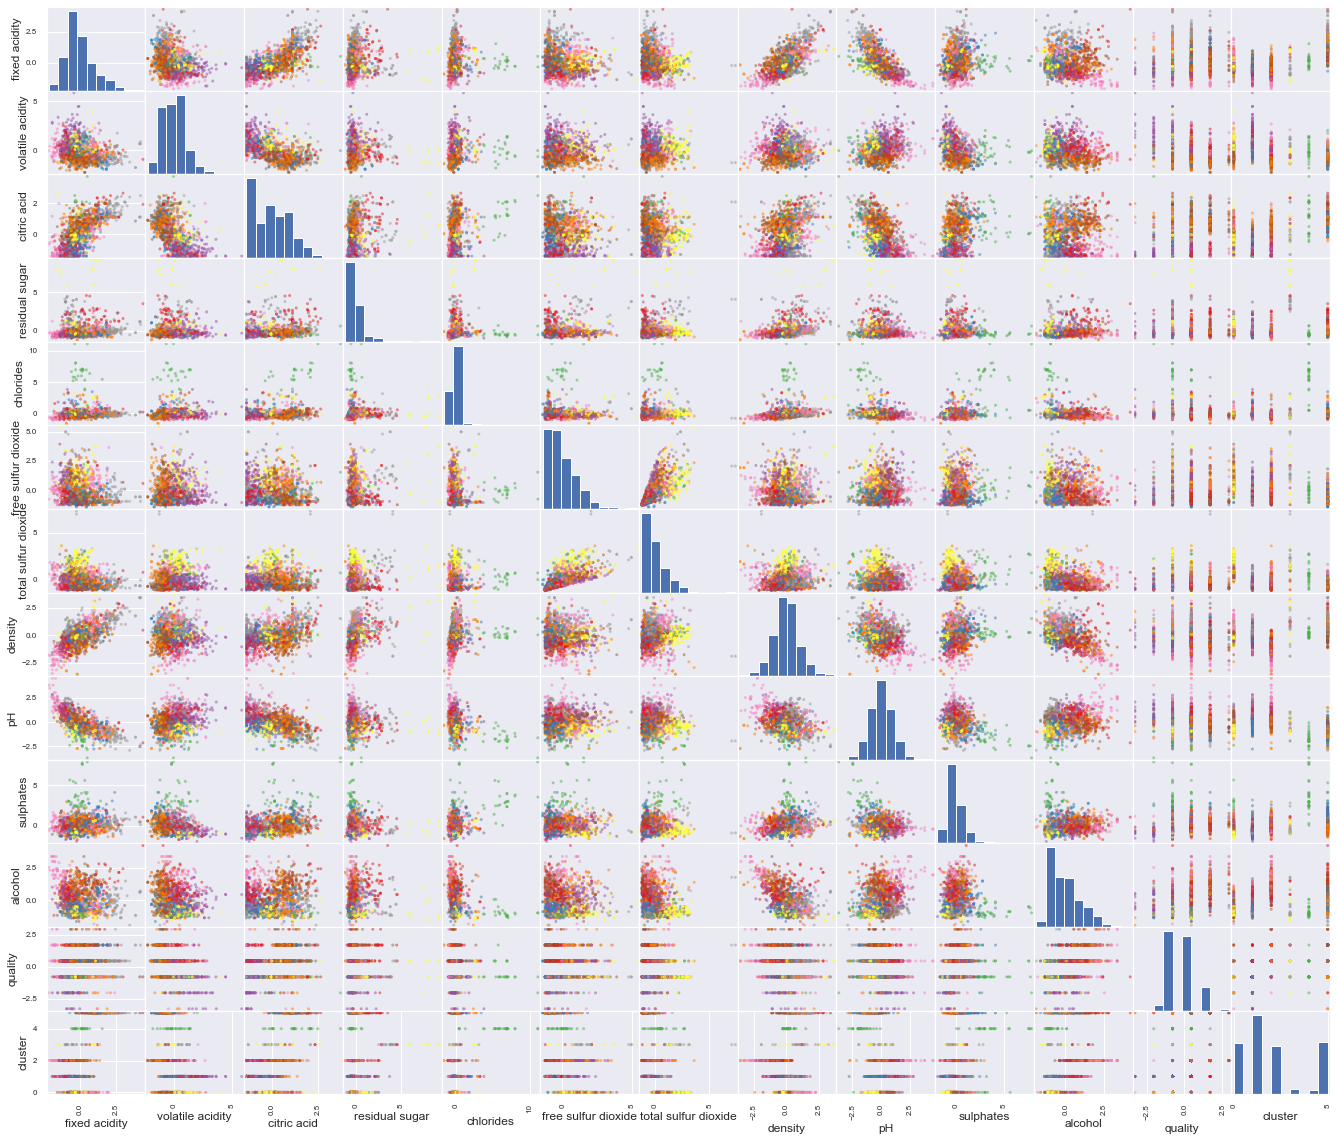

In [195]:
graph = pd.plotting.scatter_matrix(r, c=kmeans.labels_, cmap='Set1', figsize = (23,20))

#Here I am plotting a master matrix of scatter plots in order to visualize the data better 

Taking a step back to completly analyze this model. Firstly, K- mean clustering is a type of unsupervised learning that is used to define unlabled or uncategorized data. The purpose of this model structure is to find categories within the desired data that is being used, here we are using data for red wine. Using k-mean clustering allows us to assign each data point to a group within its similarities. 

By looking at the data and the visilization provided we can see that the clustering analysisze assigned free sulfure dioxide, sulphates, and alchol with high values of wine quality. As well as assigning volatile acidity, citric acid, free sulfure dioxide, total sulfure dioxide, and density with low values of wine quality.

Notice how cluster 2 provides high quality of wine. Therfore, since we are looking for the attitubes that provide a good bottle of wine; we would essentilaly be looking mainly at the alchol content (I would agree but of course my opnion is bias :D )



# 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [196]:
r = pd.DataFrame(scale(redwine),index=redwine.index,columns=redwine.columns)
ac = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='complete')
labels=ac.fit_predict(r)
print(labels)

#Here I am calling in my data again 

[0 0 0 ... 0 0 0]


In [197]:
#Squareform 
row_dist = pd.DataFrame(squareform(pdist(r,metric='euclidean')),
                       columns=labels,
                       index=labels)
row_dist

#Here I am using the squareform that creates an adjacency matrix and pdist applies euclidean distance to each combo of observations

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.000000,3.047373,2.036272,5.132132,0.000000,0.353963,2.007847,3.301943,2.858352,4.723499,...,5.072569,4.419025,3.585463,3.409960,2.806927,2.961242,4.133216,3.409960,2.893352,4.411231
0,3.047373,0.000000,1.348210,5.175964,3.047373,3.012176,2.587129,4.082473,3.944223,4.280871,...,4.244980,3.956164,4.669184,3.444768,2.910915,3.004307,4.015589,3.444768,3.326967,4.879772
0,2.036272,1.348210,0.000000,4.563223,2.036272,2.026811,1.699409,3.475064,3.102931,4.026106,...,4.456759,3.719962,4.137863,3.109376,2.620914,2.797399,3.982945,3.109376,3.105273,4.215431
0,5.132132,5.175964,4.563223,0.000000,5.132132,4.990647,4.147335,5.172647,4.498649,4.772853,...,6.196656,5.341266,6.554177,4.771542,4.816286,5.302883,5.689969,4.771542,5.652720,4.054850
0,0.000000,3.047373,2.036272,5.132132,0.000000,0.353963,2.007847,3.301943,2.858352,4.723499,...,5.072569,4.419025,3.585463,3.409960,2.806927,2.961242,4.133216,3.409960,2.893352,4.411231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2.961242,3.004307,2.797399,5.302883,2.961242,2.790721,2.690637,3.367210,3.862884,4.604130,...,4.901086,2.626245,2.894118,1.884141,2.392048,0.000000,2.073568,1.884141,1.265060,3.492656
0,4.133216,4.015589,3.982945,5.689969,4.133216,3.954605,4.121438,3.787798,4.231600,4.741557,...,5.449371,2.264965,3.146615,1.346471,2.321548,2.073568,0.000000,1.346471,1.877218,3.412926
0,3.409960,3.444768,3.109376,4.771542,3.409960,3.254839,3.326820,3.118654,3.237531,4.155005,...,5.094332,1.760350,2.995682,0.000000,1.722802,1.884141,1.346471,0.000000,1.971312,2.580939
0,2.893352,3.326967,3.105273,5.652720,2.893352,2.736687,3.235765,3.778643,4.080651,4.536014,...,5.025529,2.935270,2.866674,1.971312,2.042472,1.265060,1.877218,1.971312,0.000000,3.659934


In [198]:
row_clusters = linkage(pdist(r,metric='euclidean'),method='complete')
row_clusters

#Here I am using the condensed distance matrix that defines distance matrix and linkage for the model 
#The row_clusters has meta-data that can used to visualize the HC fit with a dendrogram

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.36000000e+02, 1.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.19100000e+03, 3.19200000e+03, 1.31143245e+01, 1.58100000e+03],
       [3.19300000e+03, 3.19400000e+03, 1.48474647e+01, 1.59700000e+03],
       [3.15800000e+03, 3.19500000e+03, 1.87246885e+01, 1.59900000e+03]])

In [199]:
print(r.values) 

row_clusters = linkage(r.values, method='complete', metric='euclidean')

#Here I an also use input sample matrix that returns the values of x data without the column labels or index
#Essentially is the same as above 

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


In [200]:
ac = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='complete') 
labels=ac.fit_predict(r)
r['Hierarchy Cluster']=labels
r['Hierarchy Cluster'].describe()

#Here I am aplying agglomerative clustering via scikit-learn, its important to note that I am seleting the clusters and extracting cluster balbel for each observation in the data 

count    1599.000000
mean        0.226391
std         0.927283
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Hierarchy Cluster, dtype: float64

In [202]:
pd.crosstab(r['Hierarchy Cluster'],r['quality'])

#Here I am using the crosstabulate function to show subtotals as well as summarizing the data 

quality,-3.265165,-2.026494,-0.787823,0.450848,1.689519,2.928190
Hierarchy Cluster,,,,,,
0,10,49,627,587,179,15
1,0,2,37,23,1,0
2,0,1,3,8,1,0
3,0,1,1,0,0,0
4,0,0,0,1,2,0
5,0,0,13,19,16,3


In [203]:
r.groupby('Hierarchy Cluster').mean().sort_values('quality',ascending=False)

#Here I am using the groupby function to create another dataframe that analyzes the clusters that are best and not good quality 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Hierarchy Cluster,,,,,,,,,,,,
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
0,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


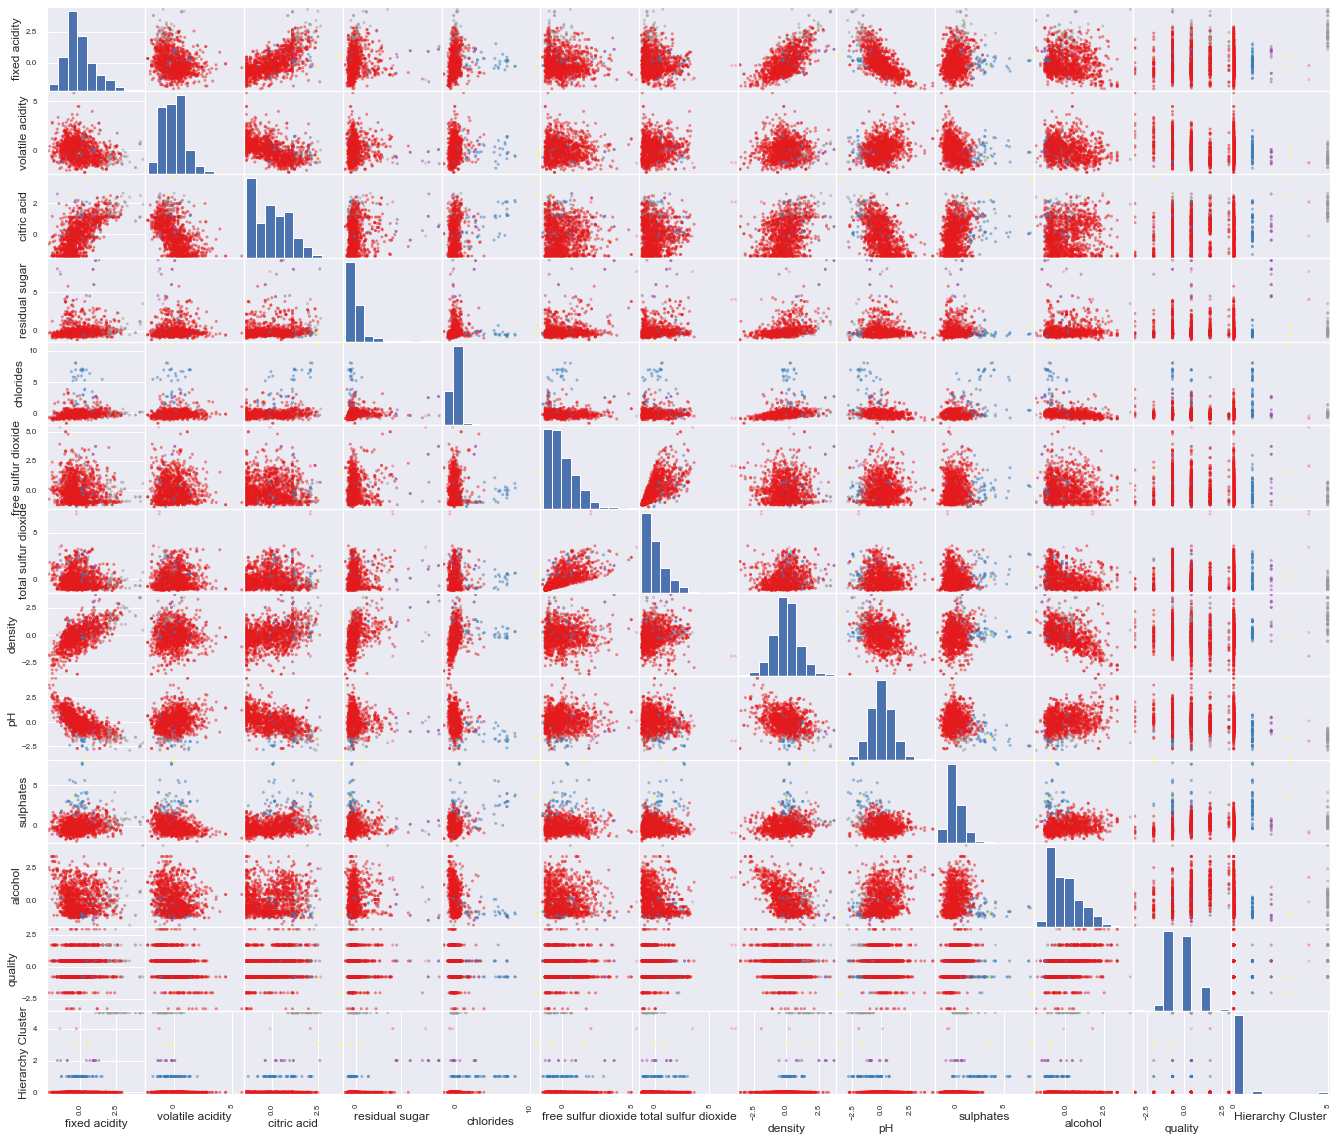

In [205]:
graph = pd.plotting.scatter_matrix(r, c=ac.labels_, cmap='Set1', figsize = (23,20))

#Here I am plotting a master matrix of scatter plots in order to visualize the data better 

TypeError: '(array([ True,  True,  True, ...,  True,  True,  True]), 0)' is an invalid key

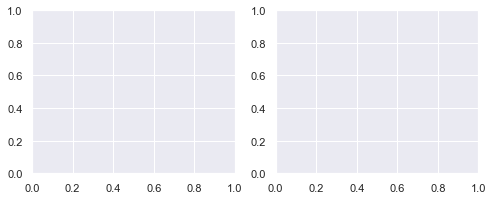

In [218]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(r)
ax1.scatter(r[y_km == 0, 0], r[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(re[y_km == 1, 0], r[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(r)
ax2.scatter(r[y_ac == 0, 0], r[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(r[y_ac == 1, 0], r[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

In this portion of the analysis we are using Hierarchical clustering which is differnt from k-means clustering because k-means clusters the data by using a pre-specified number which I used 6. Hierarchical clusters looks to build clusters without a pre assigned number. \

Here we can see that residual sugar, free sulfur dioxide, total sulfur dioxide, and alchol have the highest quality of wine. On the other hand, fixed acidity, chlorides, density, and sulphatetes have the lowest quality of wine. 

Even though ths=is differs from the previous anlaysis using k mean clustering, the ending note still remains-- alcohol content is the most important factor when trying to make a good bottle of wine! 

# 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [131]:
r = pd.DataFrame(scale(redwine),index=redwine.index,columns=redwine.columns)
r

#Here I am stating my data for the final time in this analysis 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [132]:
r.mean()

#Here i am looking at the means of my columns 

fixed acidity           3.435512e-16
volatile acidity        1.699704e-16
citric acid             4.335355e-16
residual sugar         -1.905223e-16
chlorides               4.838739e-16
free sulfur dioxide     1.432042e-16
total sulfur dioxide    1.289532e-16
density                 2.336509e-14
pH                      3.002879e-15
sulphates               7.639596e-16
alcohol                 9.437243e-16
quality                -8.051373e-16
dtype: float64

In [133]:
r.var()

#Here I am looking at the variance of my columns 

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
quality                 1.000626
dtype: float64

In [134]:
PCA().fit(r).components_.T

#Here I am looking at the components within my data and to define the direction of the vector
#In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
         0.0555313 , -0.30721496,  0.20052866, -0.17457815, -0.18295601,
        -0.25643792,  0.63857976],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
         0.297287  , -0.62623369,  0.14612614, -0.06022334,  0.15510563,
         0.37716123,  0.00466168],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.13663328,  0.24414858,  0.29633271, -0.22097505,  0.34608556,
         0.62432783, -0.07003691],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
         0.10931059,  0.28385429, -0.17062614,  0.27818728, -0.05223656,
         0.08807787,  0.18364637],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
         0.33733656,  0.23054697, -0.18692254, -0.41993639, -0.00386273,
        -0.20861667,  0.05393118],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
        -0.04264807, -

In [135]:
pca_loadings = pd.DataFrame(PCA().fit(r).components_.T,index=r.columns,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12'])
pca_loadings

#Here I am loading the data 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


In [136]:
pca=PCA()
redwine_plot = pd.DataFrame(pca.fit_transform(r),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
redwine_plot

#Here fit leanrs the components 
#Therefore I am fitting the model and transforming it to principal components 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981,0.130820,0.291926,0.137412,-0.421817,-1.016843,0.312767,-0.058920
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124,-0.751228,-0.436849,0.181539,-0.413852,-0.992136,0.465027,-0.240933
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916,-0.552162,-0.196039,-0.121154,-0.107569,-0.752854,0.235266,-0.402292
1597,-2.367147,0.703545,0.899482,0.661956,0.021380,-0.805753,0.126669,0.607400,-0.378298,-0.723453,0.737253,0.036187


In [137]:
np.sqrt(pca.explained_variance_)

#Here I am listing the SD of the principal components.. it comes out as an array 

array([1.76723537, 1.49775999, 1.29767979, 1.10262469, 0.98684987,
       0.81425235, 0.78657786, 0.71146969, 0.64153326, 0.57282161,
       0.42465446, 0.24403926])

In [138]:
pca.explained_variance_

#Here I am using explained varince for each prinicpal component vector 

array([3.12312087, 2.24328497, 1.68397283, 1.21578121, 0.97387267,
       0.66300688, 0.61870473, 0.50618912, 0.41156493, 0.3281246 ,
       0.18033141, 0.05955516])

In [139]:
pca.explained_variance_ratio_

#Here I am going the same but its the ratio 

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

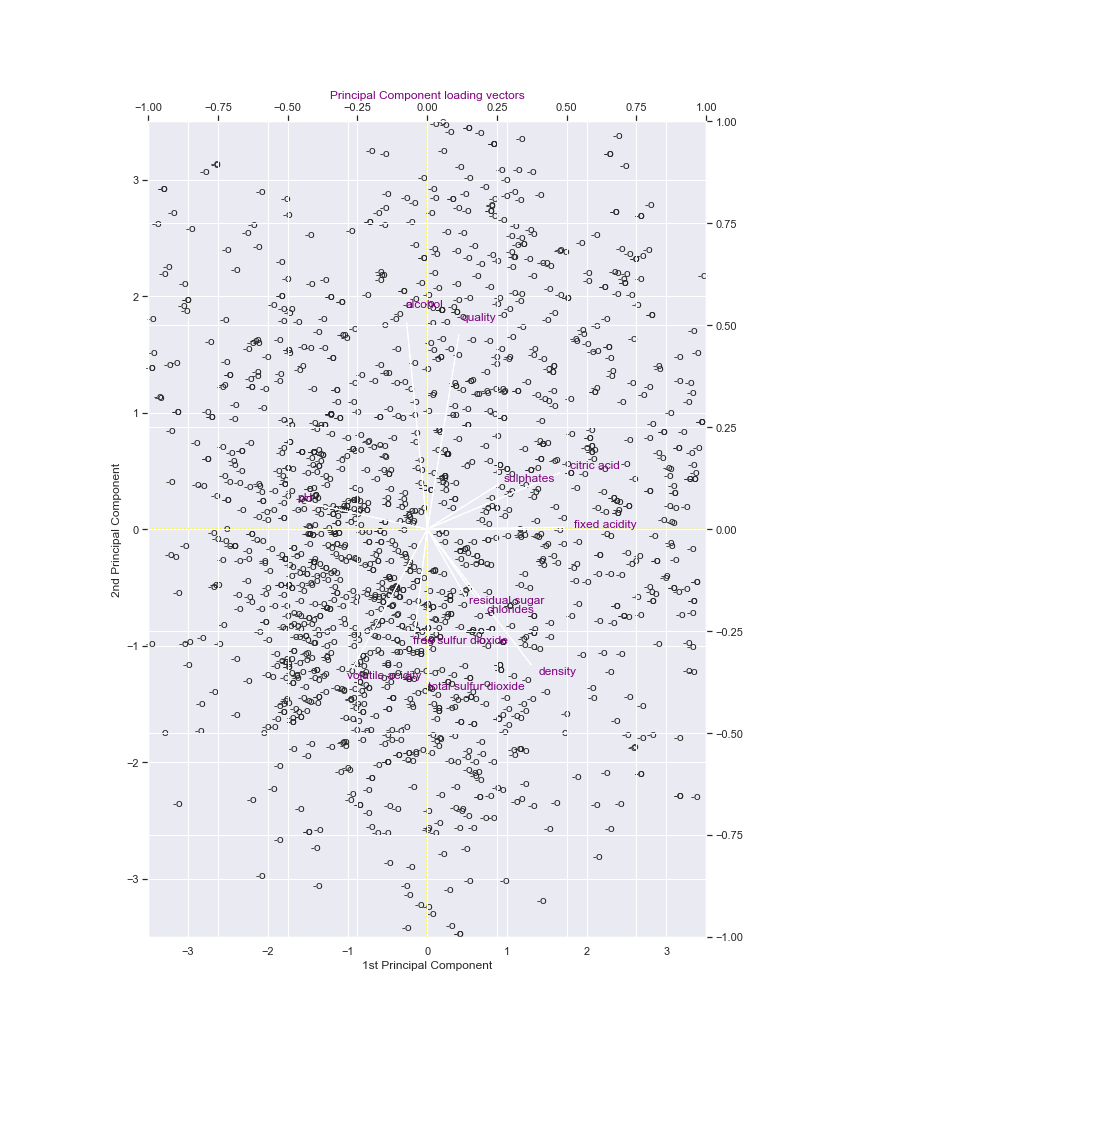

In [212]:
fig , ax1 = plt.subplots(figsize=(10,15))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

for i in redwine_plot.index:
    ax1.annotate('-o', (redwine_plot.PC1.loc[i], -redwine_plot.PC2.loc[i]), ha='center')


ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='yellow')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='yellow')

ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
    

ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='purple')
ax2.set_xlabel('Principal Component loading vectors', color='purple')


a = 1.08  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='purple')


ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,pca_loadings.V1[9], -pca_loadings.V2[9])
ax2.arrow(0,0,pca_loadings.V1[10], -pca_loadings.V2[10])
ax2.arrow(0,0,pca_loadings.V1[11], -pca_loadings.V2[11])


#Here I am creating a visualiztion that is easier to interpret to the eye 
#First I start the reference lines
#Then I state the principal component loading vectors by using another y axis 
#Moreover, I list my labels for the vectors 

In [145]:
pca70 = PCA(0.70).fit(r)
print(pca70.n_components_)
pca80 = PCA(0.80).fit(r)
print(pca80.n_components_)
pca95 = PCA(0.95).fit(r)
print(pca95.n_components_)

#Here I am fitting the model so it limits the number of componets given the pct of variance explained 
#Doing this also provides a way to extract precise components in the chart above.
#80% of variance explained with 13 PCA vectors
#95% of variance explained with 29 PCA vectors

5
6
9


In [146]:
pca=PCA(n_components=10)
pca.fit(r)
pca.explained_variance_ratio_.sum()

0.980021954512603

In [147]:
pca=PCA(n_components=2)
pca.fit(r)

PCA(n_components=2)

In [148]:
pca.explained_variance_ratio_.sum()

0.4469208117069174

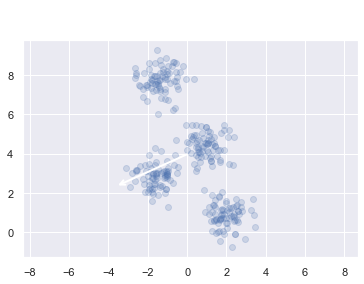

In [40]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(redwine[:, 0], redwine[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [41]:
pca = PCA(n_components=1)
pca.fit(redwine)
redwine_pca = pca.transform(redwine) # create X data with single pca vector
print("original shape:   ", redwine.shape)
print("transformed shape:", redwine_pca.shape)

original shape:    (300, 2)
transformed shape: (300, 1)


In [42]:
print(redwine[0:5,:]) #original data
print(redwine_pca[0:5,:]) #data transformed to a single pca vector

[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]
[[-2.01616694]
 [ 3.71613677]
 [ 0.55503775]
 [ 3.9234751 ]
 [-2.41689163]]


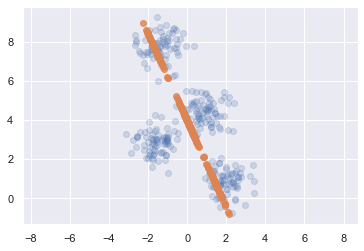

In [43]:
redwine_new = pca.inverse_transform(redwine_pca) # inverse_transform returns pc vector to original matrix
plt.scatter(redwine[:, 0], redwine[:, 1], alpha=0.2)
plt.scatter(redwine_new[:, 0], redwine_new[:, 1], alpha=0.8)
plt.axis('equal');

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [45]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


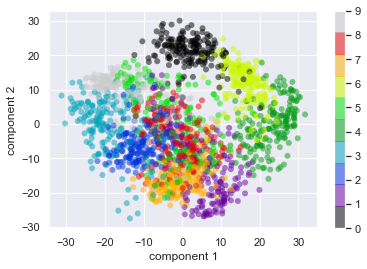

In [46]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

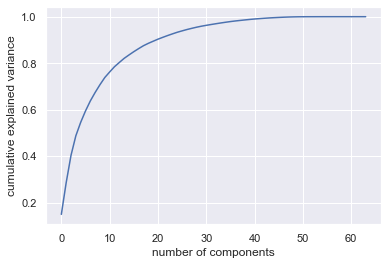

In [48]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

PCA is a useful took for visulization and for noice filtering. 

As explained above, the 9 components in this analysis portrays 95% of the variance in the data and so on and for forth.  